In [1]:
import os
import math
import imblearn
import logging
import warnings
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score , accuracy_score , precision_score, recall_score ,confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import genfromtxt
from mpl_toolkits.mplot3d import Axes3D
from imblearn.combine import SMOTEENN
%matplotlib inline




from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

# Check if TensorFlow detects a GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


2024-10-20 12:18:05.980270: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-20 12:18:05.994368: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 12:18:06.010712: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 12:18:06.014420: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 12:18:06.025059: I tensorflow/core/platform/cpu_feature_guar

Num GPUs Available:  1


I0000 00:00:1729406887.756112    9477 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729406887.794142    9477 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729406887.797677    9477 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


In [3]:

df = pd.read_csv('Epileptic Seizure Recognition.csv')
df.head()


,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [4]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


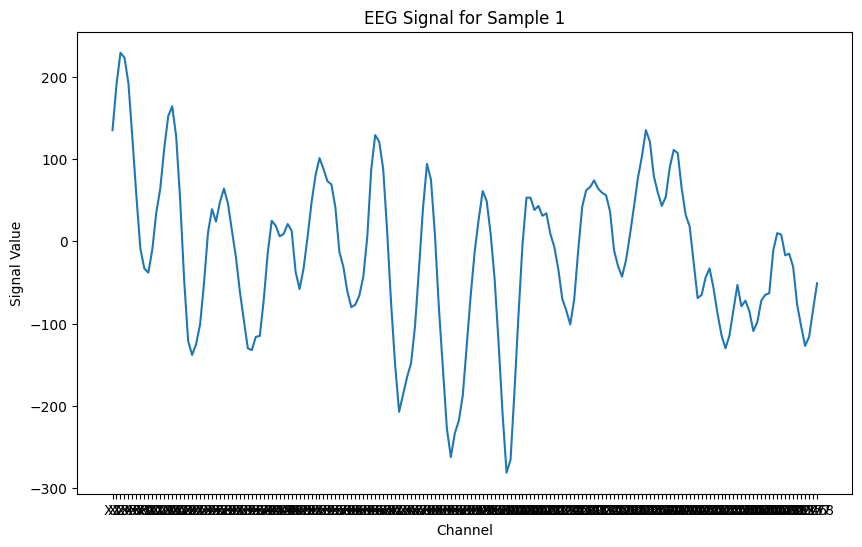

In [6]:

plt.figure(figsize=(10, 6))
plt.plot(df.iloc[0, 1:-1])  
plt.title('EEG Signal for Sample 1')
plt.xlabel('Channel')
plt.ylabel('Signal Value')
plt.show()


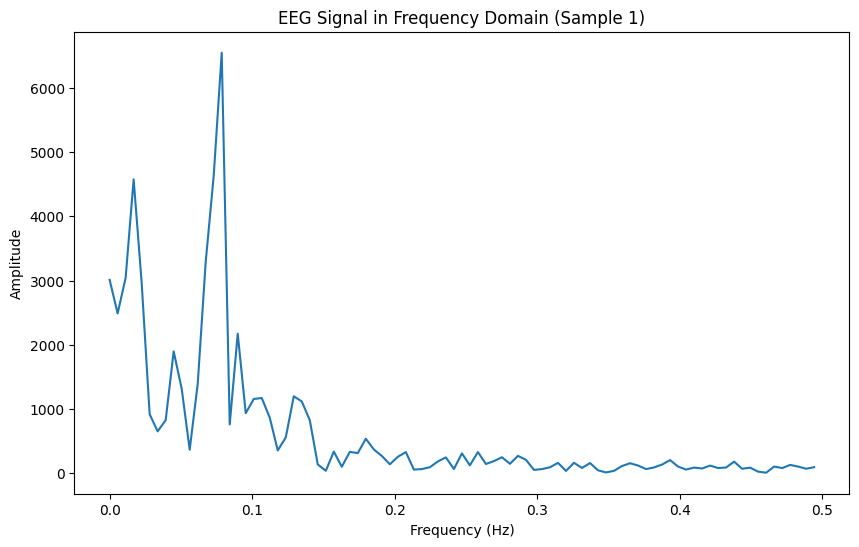

In [7]:
import numpy as np

# Perform FFT on the first sample
sample_signal = df.iloc[0, 1:-1]
fft_values = np.fft.fft(sample_signal)
frequencies = np.fft.fftfreq(len(sample_signal))

# Plot the FFT result (frequency domain)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_values)[:len(frequencies)//2])
plt.title('EEG Signal in Frequency Domain (Sample 1)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


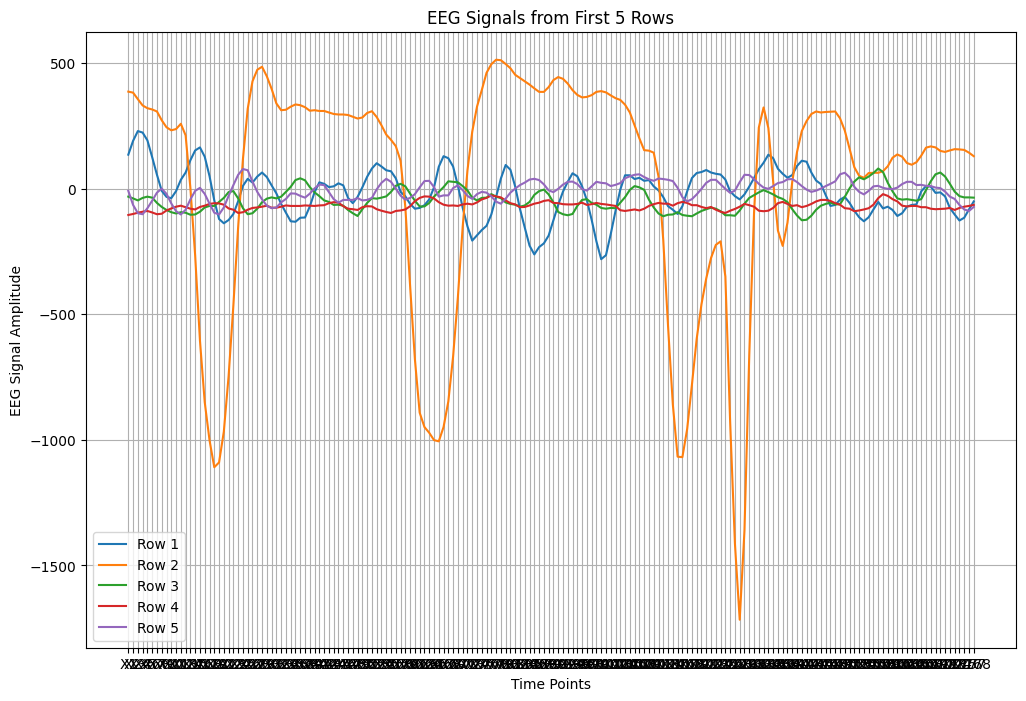

In [8]:
plt.figure(figsize=(12, 8))

for i in range(5):
    eeg_signal = df.iloc[i, 1:-1].astype(float)
    plt.plot(eeg_signal, label=f'Row {i + 1}')

plt.xlabel('Time Points')
plt.ylabel('EEG Signal Amplitude')
plt.title('EEG Signals from First 5 Rows')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
df['y']=df['y'].replace([2,3,4,5],0)


In [10]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [11]:
df.y.value_counts()

y
0    9200
1    2300
Name: count, dtype: int64

In [12]:
df=df.drop(['Unnamed'], axis=1)

In [13]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [14]:
X  = df.drop(['y'], axis=1)
y = df['y']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [16]:
X_val

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
1313,-14,-22,-20,-16,-2,0,-3,-9,-3,-4,...,4,11,3,-4,-9,-12,-17,-9,7,25
3132,-129,-120,-132,-147,-161,-132,-101,-81,-94,-91,...,-92,-103,-106,-106,-107,-105,-112,-124,-127,-125
2932,-7,-4,-2,-7,-13,-24,-29,-14,-6,-2,...,21,14,4,11,19,15,10,-1,-1,3
8613,-96,-76,-65,-45,-38,-42,-38,-38,-47,-42,...,-22,-27,-32,-35,-43,-46,-48,-46,-37,-34
3382,-493,-312,-285,-430,-621,-864,-885,-720,-406,-135,...,379,132,-76,-168,-183,-142,-234,-220,-80,417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10184,11,2,-4,-7,-12,-21,-24,-25,-24,-23,...,-13,-15,-6,-11,-16,-7,-7,-5,-10,-7
5900,344,267,153,17,-96,-223,-386,-561,-689,-631,...,-532,-406,-277,-142,-15,151,246,331,303,227
11279,-133,-127,-133,-134,-123,-113,-91,-82,-79,-92,...,-13,-38,-50,-74,-96,-109,-128,-120,-122,-102
5844,128,-154,-380,-525,-561,-502,-384,-259,-208,-233,...,946,864,725,569,415,266,90,-80,-187,-239


In [17]:
X_train.shape

(6900, 178)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#now we will going to scale the dataset
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Start Building our model

In [19]:
from tensorflow.keras.layers import Dense, BatchNormalization,Dropout,LSTM,Dense,Activation,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import callbacks

In [20]:
X_train.shape

(6900, 178)

In [21]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(173, 1), return_sequences=True))
model.add(Dropout(0.2)) 
model.add(LSTM(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()


I0000 00:00:1729406889.688225    9477 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729406889.691234    9477 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729406889.693729    9477 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729406889.857541    9477 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 173, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 173, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [23]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20


2024-10-20 12:18:12.059266: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


173/173 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8827 - loss: 0.3559 - val_accuracy: 0.7696 - val_loss: 0.4235
Epoch 2/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8403 - loss: 0.2984 - val_accuracy: 0.8558 - val_loss: 0.2981
Epoch 3/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8648 - loss: 0.2835 - val_accuracy: 0.8957 - val_loss: 0.3168
Epoch 4/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9267 - loss: 0.2550 - val_accuracy: 0.8899 - val_loss: 0.3177
Epoch 5/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9231 - loss: 0.2635 - val_accuracy: 0.9268 - val_loss: 0.2523
Epoch 6/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8984 - loss: 0.2996 - val_accuracy: 0.9181 - val_loss: 0.2041
Epoch 7/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9129 - loss: 0.2449 - val_accuracy: 0.9283 - val_loss: 0.1802
Epoch 8/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9554 - loss: 0.1370 - val_accuracy: 0.968

In [24]:
model.layers[0].get_weights()

[array([[-1.59874573e-01, -1.18138969e-01, -1.85290352e-01,
         -1.17141148e-02,  3.85197461e-01, -1.58353269e-01,
          2.05674410e-01, -1.19170964e-01, -3.42370234e-02,
         -4.27584238e-02, -8.79050419e-02, -1.43349141e-01,
         -2.24580839e-02,  4.08878960e-02, -1.29428059e-01,
          8.61576796e-02, -2.11310163e-01,  2.35385299e-02,
          1.71407640e-01,  1.73396289e-01, -1.80965334e-01,
         -1.88201189e-01,  9.19096321e-02, -1.48344308e-01,
          1.51150674e-01, -9.88668054e-02,  2.23843336e-01,
         -6.72759339e-02,  3.27904262e-02,  2.54872561e-01,
         -4.33434471e-02,  8.18613395e-02,  3.47875983e-01,
         -2.64511049e-01, -2.19733007e-02, -6.06698170e-02,
         -2.26518854e-01,  7.24954545e-01, -2.74163306e-01,
         -1.39100075e-01,  2.49851495e-01,  1.89709038e-01,
         -2.13654637e-01,  2.09726751e-01,  5.12491092e-02,
         -3.35155204e-02, -7.46467859e-02,  1.35749131e-01,
         -6.30888715e-03,  1.17251262e-0

In [25]:
y_log=model.predict(X_test)

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [26]:
y_log

array([[4.5548001e-04],
       [6.9344445e-04],
       [9.9223727e-01],
       ...,
       [5.4937025e-04],
       [9.8934108e-01],
       [6.4415543e-04]], dtype=float32)

In [27]:
y_pred=np.where(y_log>0.5,1,0)

In [28]:
y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [29]:
accuracy_score(y_test,y_pred)

0.9804347826086957

In [30]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='binary')
f1

0.9540347293156282

In [31]:
a=history.history

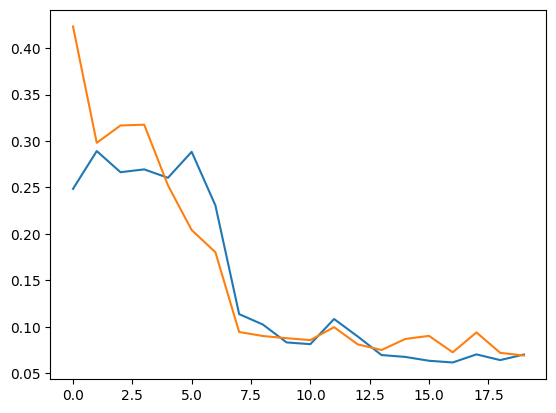

In [32]:
import matplotlib.pyplot as mlt
mlt.plot(history.history['loss'])
mlt.plot(history.history['val_loss'])

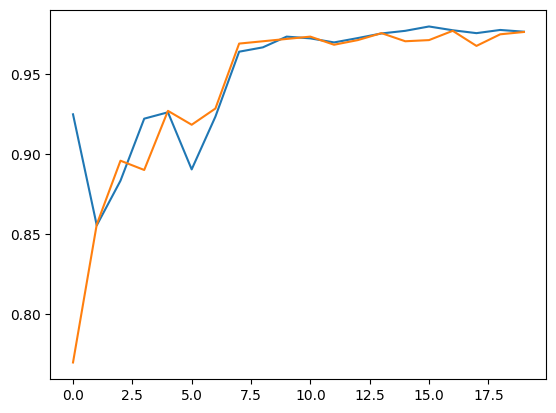

In [33]:
mlt.plot(history.history['accuracy'])
mlt.plot(history.history['val_accuracy'])

In [34]:
import pickle
with open("ann_model.pkl", "wb") as file:
    pickle.dump(model, file)